### 1. Khai báo thư viện 

In [658]:
import pandas as pd # Pandas (version : 1.1.5) 
import numpy as np # Numpy (version : 1.19.2)
import matplotlib.pyplot as plt # Matplotlib (version :  3.3.2)
from sklearn.cluster import KMeans # Scikit Learn (version : 0.23.2)
import seaborn as sns # Seaborn (version : 0.11.1)
plt.style.use('seaborn-v0_8-darkgrid')

---

### 2. Tải tệp dữ liệu

In [659]:
data = pd.read_csv('data/shopping_behavior_updated.csv')


In [660]:
unique_values = data["Frequency of Purchases"].unique()
print(unique_values)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


In [661]:
unique_values = data["Payment Method"].unique()
print(unique_values)

['Venmo' 'Cash' 'Credit Card' 'PayPal' 'Bank Transfer' 'Debit Card']


In [662]:
unique_values = data["Shipping Type"].unique()
print(unique_values)

['Express' 'Free Shipping' 'Next Day Air' 'Standard' '2-Day Shipping'
 'Store Pickup']


In [663]:
unique_values = data["Season"].unique()
print(unique_values)

['Winter' 'Spring' 'Summer' 'Fall']


In [664]:
unique_values = data["Color"].unique()
print(unique_values)

['Gray' 'Maroon' 'Turquoise' 'White' 'Charcoal' 'Silver' 'Pink' 'Purple'
 'Olive' 'Gold' 'Violet' 'Teal' 'Lavender' 'Black' 'Green' 'Peach' 'Red'
 'Cyan' 'Brown' 'Beige' 'Orange' 'Indigo' 'Yellow' 'Magenta' 'Blue']


In [665]:
unique_values = data["Size"].unique()
print(unique_values)

['L' 'S' 'M' 'XL']


In [666]:
unique_values = data["Location"].unique()
print(unique_values)

['Kentucky' 'Maine' 'Massachusetts' 'Rhode Island' 'Oregon' 'Wyoming'
 'Montana' 'Louisiana' 'West Virginia' 'Missouri' 'Arkansas' 'Hawaii'
 'Delaware' 'New Hampshire' 'New York' 'Alabama' 'Mississippi'
 'North Carolina' 'California' 'Oklahoma' 'Florida' 'Texas' 'Nevada'
 'Kansas' 'Colorado' 'North Dakota' 'Illinois' 'Indiana' 'Arizona'
 'Alaska' 'Tennessee' 'Ohio' 'New Jersey' 'Maryland' 'Vermont'
 'New Mexico' 'South Carolina' 'Idaho' 'Pennsylvania' 'Connecticut' 'Utah'
 'Virginia' 'Georgia' 'Nebraska' 'Iowa' 'South Dakota' 'Minnesota'
 'Washington' 'Wisconsin' 'Michigan']


In [667]:
unique_values = data["Category"].unique()
print(unique_values)

['Clothing' 'Footwear' 'Outerwear' 'Accessories']


In [668]:
unique_values = data["Item Purchased"].unique()
print(unique_values)

['Blouse' 'Sweater' 'Jeans' 'Sandals' 'Sneakers' 'Shirt' 'Shorts' 'Coat'
 'Handbag' 'Shoes' 'Dress' 'Skirt' 'Sunglasses' 'Pants' 'Jacket' 'Hoodie'
 'Jewelry' 'T-shirt' 'Scarf' 'Hat' 'Socks' 'Backpack' 'Belt' 'Boots'
 'Gloves']


In [669]:
import pandas as pd

# Đọc dữ liệu
data = pd.read_csv('data/shopping_behavior_updated.csv')

# Chọn các cột cần one-hot encoding
columns_to_encode = [
    "Payment Method", "Shipping Type", "Season", "Color", "Size", "Location",
    "Category", "Item Purchased"
]

# Thực hiện One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=columns_to_encode)

# Kiểm tra kết quả
print(data.head())

# Lưu lại dữ liệu đã mã hóa
data_encoded.to_csv('data/shopping_behavior_encoded.csv', index=False)
data =pd.read_csv('data/shopping_behavior_encoded.csv') 


   CustomerID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0           1   55   Male         Blouse  Clothing                     53   
1           2   19   Male        Sweater  Clothing                     64   
2           3   50   Male          Jeans  Clothing                     73   
3           4   21   Male        Sandals  Footwear                     90   
4           5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Pu

ở bước này chúng ta sẽ kiểm tra thử quá trình tải tệp dữ liệu có bị lỗi hoặc tải nhầm tệp dữ liệu hay không

In [670]:
data

,CustomerID,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,1,55,Male,53,3.1,Yes,Yes,Yes,14,Fortnightly,...,False,False,False,False,False,False,False,False,False,False
1,2,19,Male,64,3.1,Yes,Yes,Yes,2,Fortnightly,...,False,False,False,False,False,False,False,False,True,False
2,3,50,Male,73,3.1,Yes,Yes,Yes,23,Weekly,...,False,False,False,False,False,False,False,False,False,False
3,4,21,Male,90,3.5,Yes,Yes,Yes,49,Weekly,...,False,False,False,False,False,False,False,False,False,False
4,5,45,Male,49,2.7,Yes,Yes,Yes,31,Annually,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,28,4.2,No,No,No,32,Weekly,...,False,False,False,False,False,False,False,False,False,False
3896,3897,52,Female,49,4.5,No,No,No,41,Bi-Weekly,...,False,False,False,False,False,False,False,False,False,False
3897,3898,46,Female,33,2.9,No,No,No,24,Quarterly,...,False,False,False,False,False,False,False,False,False,False
3898,3899,44,Female,77,3.8,No,No,No,24,Weekly,...,False,False,True,False,False,False,False,False,False,False


In [671]:
mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Annually': 365,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Monthly': 30,
    'Every 3 Months': 90
}

# Chuyển đổi cột "Frequency of Purchases"
data['Frequency of Purchases'] = data['Frequency of Purchases'].map(mapping)


In [672]:
data=data.drop(columns=['CustomerID'])
data


,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Payment Method_Bank Transfer,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,55,Male,53,3.1,Yes,Yes,Yes,14,14,False,...,False,False,False,False,False,False,False,False,False,False
1,19,Male,64,3.1,Yes,Yes,Yes,2,14,False,...,False,False,False,False,False,False,False,False,True,False
2,50,Male,73,3.1,Yes,Yes,Yes,23,7,False,...,False,False,False,False,False,False,False,False,False,False
3,21,Male,90,3.5,Yes,Yes,Yes,49,7,False,...,False,False,False,False,False,False,False,False,False,False
4,45,Male,49,2.7,Yes,Yes,Yes,31,365,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,Female,28,4.2,No,No,No,32,7,False,...,False,False,False,False,False,False,False,False,False,False
3896,52,Female,49,4.5,No,No,No,41,14,True,...,False,False,False,False,False,False,False,False,False,False
3897,46,Female,33,2.9,No,No,No,24,90,False,...,False,False,False,False,False,False,False,False,False,False
3898,44,Female,77,3.8,No,No,No,24,7,False,...,False,False,True,False,False,False,False,False,False,False


In [675]:
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype.name == 'bool':  # Kiểm tra kiểu dữ liệu
        le = LabelEncoder()  
        data[col] = le.fit_transform(data[col])  # Ánh xạ giá trị thành số


---

### 3. Viewing and Describing the data

In [676]:
data

,Age,Gender,Purchase Amount (USD),Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Payment Method_Bank Transfer,...,Item Purchased_Scarf,Item Purchased_Shirt,Item Purchased_Shoes,Item Purchased_Shorts,Item Purchased_Skirt,Item Purchased_Sneakers,Item Purchased_Socks,Item Purchased_Sunglasses,Item Purchased_Sweater,Item Purchased_T-shirt
0,55,1,53,3.1,1,1,1,14,14,0,...,0,0,0,0,0,0,0,0,0,0
1,19,1,64,3.1,1,1,1,2,14,0,...,0,0,0,0,0,0,0,0,1,0
2,50,1,73,3.1,1,1,1,23,7,0,...,0,0,0,0,0,0,0,0,0,0
3,21,1,90,3.5,1,1,1,49,7,0,...,0,0,0,0,0,0,0,0,0,0
4,45,1,49,2.7,1,1,1,31,365,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,0,28,4.2,0,0,0,32,7,0,...,0,0,0,0,0,0,0,0,0,0
3896,52,0,49,4.5,0,0,0,41,14,1,...,0,0,0,0,0,0,0,0,0,0
3897,46,0,33,2.9,0,0,0,24,90,0,...,0,0,0,0,0,0,0,0,0,0
3898,44,0,77,3.8,0,0,0,24,7,0,...,0,0,1,0,0,0,0,0,0,0


### 5. Understanding and Visualizing Data

Finding and viewing Corelations in the data and columns using `corr()`.

In [674]:
corr = data.corr()
corr

ValueError: could not convert string to float: 'Male'

Plotting the heatmap of correlation of all the columns of the dataset.

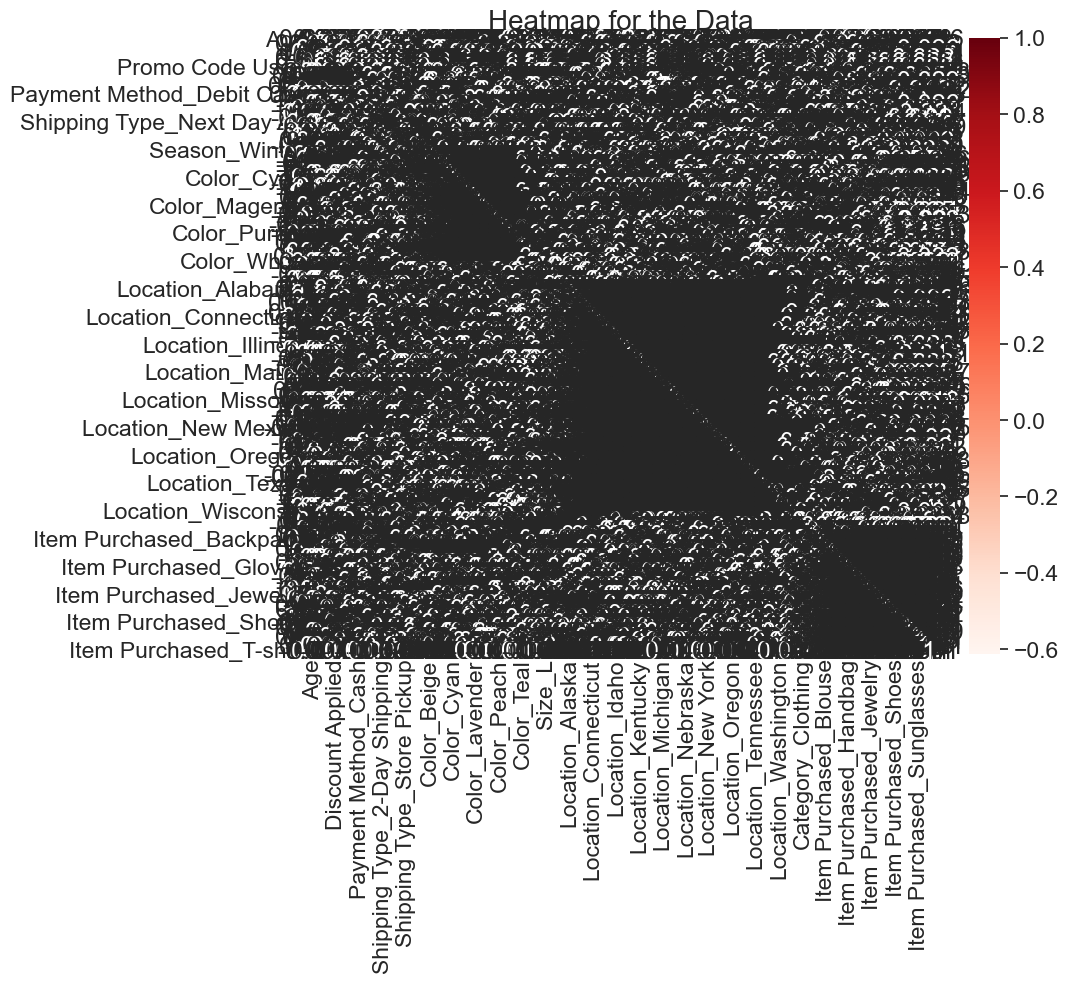

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set(font_scale=1.5)
ax = sns.heatmap(corr, cmap = 'Reds', annot = True, linewidths=0.5, linecolor='black')
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

1️⃣ "Gender" có mối quan hệ mạnh với "Subscription Status" (0.417)

Giới tính ảnh hưởng đến việc khách hàng có đăng ký dịch vụ hay không.

Chỉ số này khá cao, cho thấy có một nhóm giới tính chiếm ưu thế trong nhóm đăng ký.

2️⃣ "Gender" có mối quan hệ rất mạnh với "Discount Applied" và "Promo Code Used" (cùng 0.595)

Giới tính có ảnh hưởng lớn đến việc khách hàng có sử dụng mã giảm giá hay không.

Có thể một giới tính thích săn mã giảm giá hoặc có xu hướng tận dụng khuyến mãi nhiều hơn.

3️⃣ "Subscription Status" có mối quan hệ rất mạnh với "Discount Applied" và "Promo Code Used" (cùng 0.700)

Những người đăng ký dịch vụ thường có xu hướng sử dụng khuyến mãi, voucher nhiều hơn.

4️⃣ "Previous Purchases" có mối quan hệ dương với "Age" (0.040)

Tuổi cao hơn có thể liên quan đến số lần mua hàng trước đó nhiều hơn.

5️⃣ "Payment Method" có mối quan hệ âm với "Frequency of Purchases" (-0.039)

Phương thức thanh toán có thể ảnh hưởng đến tần suất mua hàng, nhưng mức độ tác động khá nhỏ.

=> dùng 2 yếu tố là Subscription Status và Gender sẽ được sử dụng phân tích trong bài này 

C:\Users\ASUS\AppData\Local\Temp\ipykernel_31728\3988571816.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["blue", "pink"])


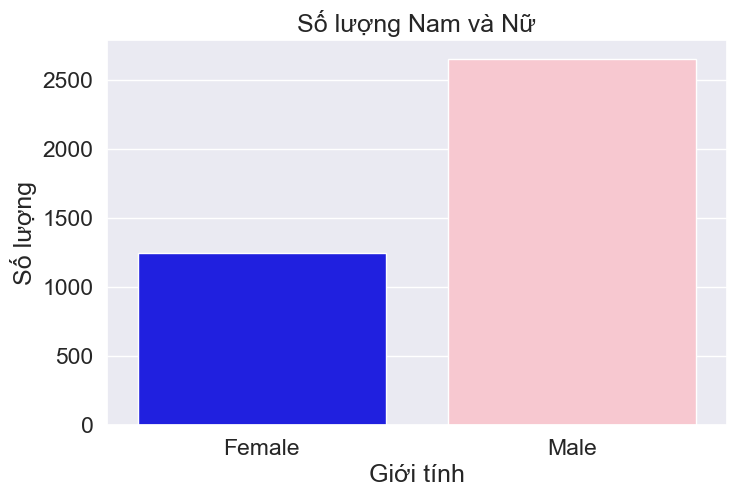

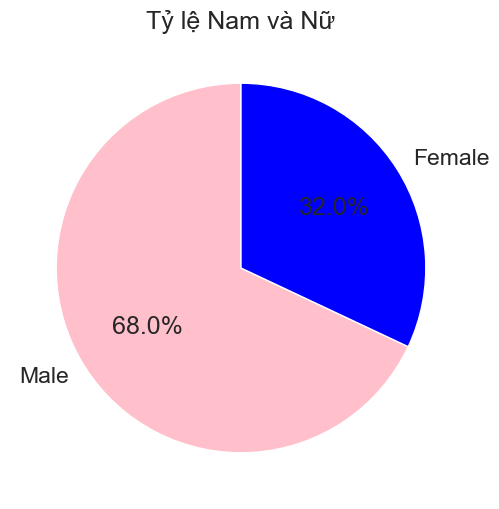

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Đếm số lượng giới tính
gender_counts = data["Gender"].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=["blue", "pink"])
plt.xticks(ticks=gender_counts.index, labels=["Male", "Female"])
plt.title("Số lượng Nam và Nữ")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.show()

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=["Male", "Female"], autopct="%1.1f%%", colors=["pink", "blue"], startangle=90)
plt.title("Tỷ lệ Nam và Nữ")
plt.show()


#### SVM

In [ ]:
# 1. Tải thư viện
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# 2. Tải dữ liệu
data = pd.read_csv('data/shopping_behavior_updated.csv')

# 3. Mã hóa biến phân loại
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Promo Code Used'] = le.fit_transform(data['Promo Code Used'])

# 4. Chọn đặc trưng và mục tiêu
features = ['Age', 'Gender', 'Purchase Amount (USD)', 'Category', 'Season', 'Review Rating']
target = 'Promo Code Used'
X = data[features]
y = data[target]

# Mã hóa one-hot
X = pd.get_dummies(X, columns=['Category', 'Season'], drop_first=True)

# 5. Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Chuẩn hóa đặc trưng
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Huấn luyện mô hình SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_scaled, y_train)

# 8. Dự đoán và đánh giá
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Độ chính xác: {accuracy:.4f}')
print('Báo cáo phân loại:')
print(classification_report(y_test, y_pred))

Độ chính xác: 0.7513
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70       422
           1       0.65      1.00      0.79       358

    accuracy                           0.75       780
   macro avg       0.82      0.77      0.74       780
weighted avg       0.84      0.75      0.74       780



#### K - Means Clustering

Age                         int64
Purchase Amount (USD)       int64
Previous Purchases          int64
Review Rating             float64
Frequency of Purchases     object
dtype: object


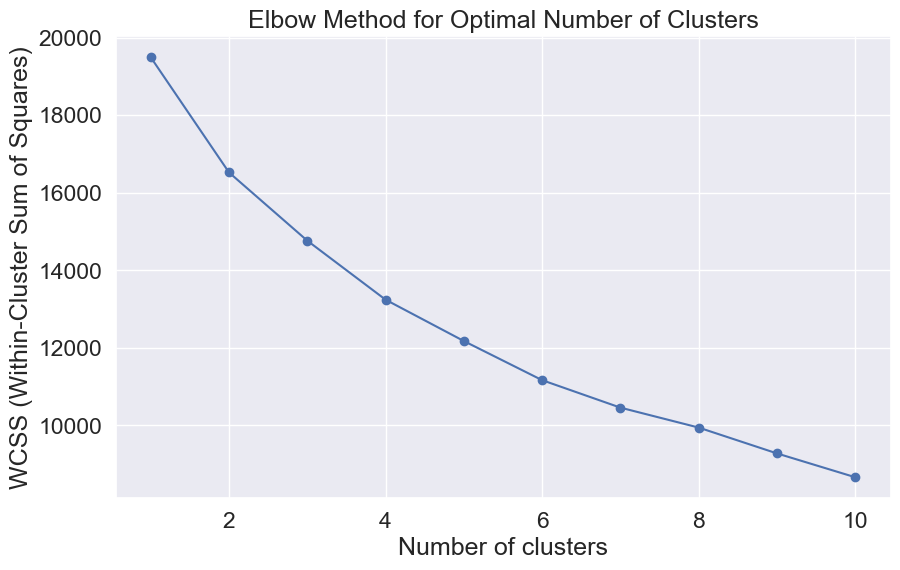

Silhouette Score - K-Means: 0.1479
Davies-Bouldin Index - K-Means: 1.6535


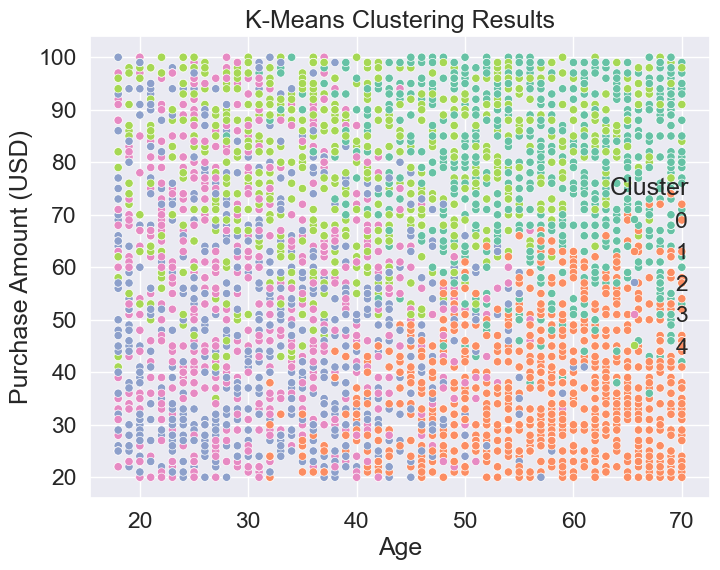

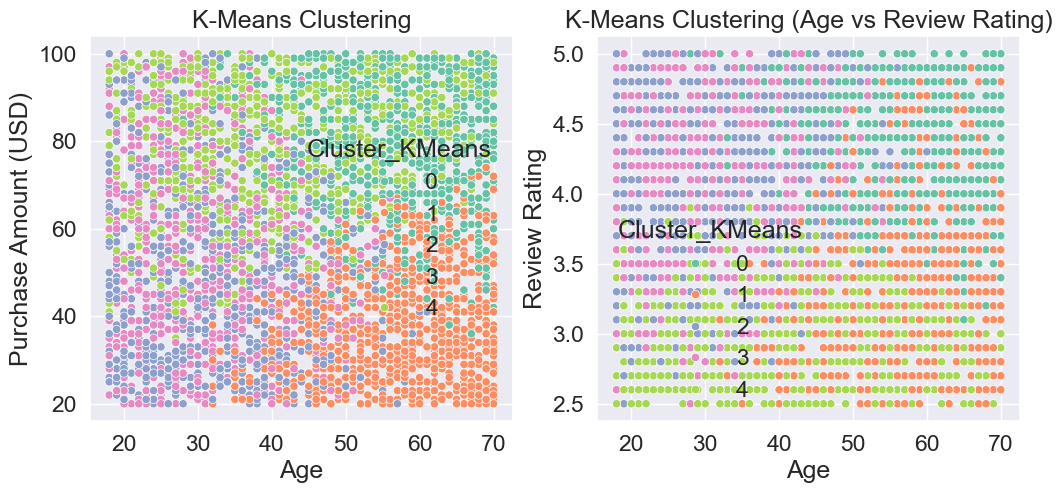

In [ ]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Đọc dữ liệu từ tệp CSV
data_path = "data/shopping_behavior_updated.csv"
df = pd.read_csv(data_path)

# Chọn các cột số để phân cụm
selected_columns = ['Age', 'Purchase Amount (USD)', 'Previous Purchases', 'Review Rating', 'Frequency of Purchases']

# Kiểm tra kiểu dữ liệu
print(df[selected_columns].dtypes)

# Xử lý cột không phải số
if 'Frequency of Purchases' in df.columns and df['Frequency of Purchases'].dtype == 'object':
    df['Frequency of Purchases'] = LabelEncoder().fit_transform(df['Frequency of Purchases'])

# Giữ lại chỉ các cột số
data = df[selected_columns].select_dtypes(include=['number']).dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Tìm số cụm tối ưu bằng phương pháp Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Áp dụng K-means clustering với số cụm tối ưu
optimal_clusters = 5  # Chọn số cụm từ biểu đồ Elbow
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(data_scaled)
df['Cluster_KMeans'] = clusters_kmeans

# Đánh giá hiệu suất phân cụm
silhouette_kmeans = silhouette_score(data_scaled, clusters_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(data_scaled, clusters_kmeans)

print(f'Silhouette Score - K-Means: {silhouette_kmeans:.4f}')
print(f'Davies-Bouldin Index - K-Means: {davies_bouldin_kmeans:.4f}')

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_KMeans'], palette='Set2')
plt.title('K-Means Clustering Results')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

# Vẽ biểu đồ so sánh
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(ax=axes[0], x=df['Age'], y=df['Purchase Amount (USD)'], hue=df['Cluster_KMeans'], palette='Set2')
axes[0].set_title('K-Means Clustering')
sns.scatterplot(ax=axes[1], x=df['Age'], y=df['Review Rating'], hue=df['Cluster_KMeans'], palette='Set2')
axes[1].set_title('K-Means Clustering (Age vs Review Rating)')
plt.show()